In [13]:
import time
import bz2
import json
import pickle
import gc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import utils

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/sciclone/data10/twford/reddit/reddit/comments/'
BASE_PATH = '/sciclone/geograd/stmorse/reddit/'

# Examine cluster content

In [5]:
sample_sentences, sample_embeddings = utils.sample_cluster_sentences_and_embeddings(
    0, 
    0.01,
    years=[2007],
    months=['01'],
    seed=123
)

Loading ... 
> 2007-01: cluster size 4119, sampling ... (0.13)
> Sampled (s: 41) (e: (41, 384)) (3.11)
COMPLETE: 41, (41, 384)


In [6]:
cluster_centers = utils.load_cc('mbkm_cc_20_2007_2011')
cluster_centers.shape

(20, 384)

In [7]:
closest_points = utils.get_closest_vectors(cluster_centers[0], sample_embeddings, top_k=10)
closest_sentences = [sample_sentences[i] for i in closest_points]

print('\n'.join(closest_sentences))

If the baseline was everyone in our society having good healthcare, people would have to justify being jackasses and accumulating wealth by swindling or oppressing others by other means than "I want to be able to afford cancer treatment for my kids", etc.
That's an interesting link, thanks!

From a [related post](http://angrybear.blogspot.com/2005/04/real-crisis.html):

&gt; But this is just a sample; there's virtually no metric in which the US health care system provides better care than those of other countries, other than in care for the very rich. The reality is that the average person in the US receives mediocre care that is extremely expensive.

But doesn't this beg the question of whether % of GDP is the right number to be looking at? The very rich in the US, IIRC, contribute a disproportionate amount to GDP, so shouldn't it stand to reason that they are responsible for a disproportionate share of health care costs? Bill Gates probably spends more than $5,000 a year for his heal

# Plot all clusters over a sample

In [9]:
cluster_centers = utils.load_cc('mbkm_cc_20_2007_2011')
num_clusters = cluster_centers.shape[0]
cluster_centers.shape

(20, 384)

In [10]:
sample_embeddings, sample_labels = utils.sample_embeddings_and_labels(
    0.01, 
    years=[2007],
    months=['01'],
    seed=123
)
sample_embeddings.shape

Loading ...
> 2007-01: Sampling 589 from 58954 ... (0.32)
Complete.  Labels: (589,), Embeds: (589, 384)


(589, 384)

In [11]:
tsne = TSNE(n_components=2,
            perplexity=50.0,  # similar to nearest neighbors, 5-50
            early_exaggeration=24.0)  # tight in original -> tight in embedded 
tsne_values = tsne.fit_transform(sample_embeddings)

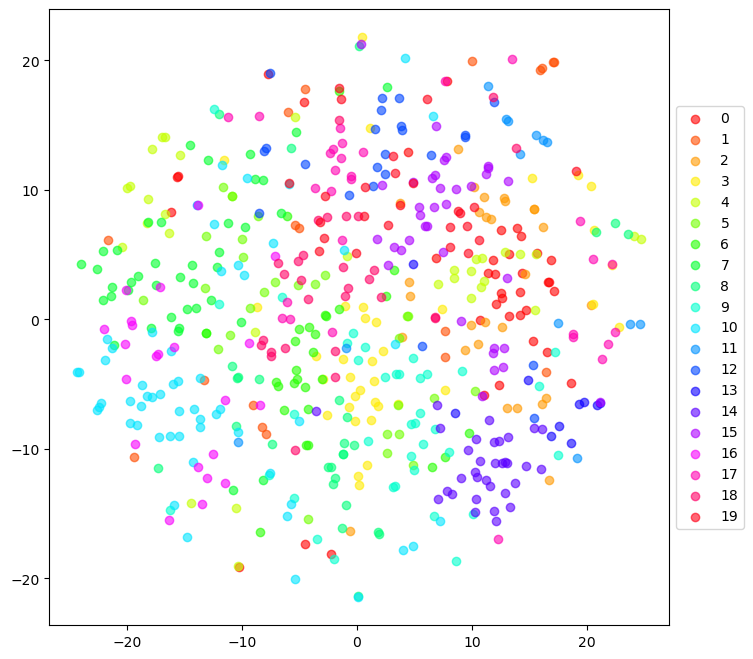

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

# get colors for each cluster
colors = plt.cm.hsv(np.linspace(0, 1, num_clusters))

for i in range(num_clusters):
    idx = np.where(sample_labels == i)[0]
    ax.scatter(tsne_values[idx, 0], 
               tsne_values[idx, 1], 
               c=[colors[i]], alpha=0.6, label=i)

# put the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Sub-cluster

In [ ]:
# TODO

# Topic dynamics

In [ ]:
# run model over 2007, 2008, 2009
# find a similar enough cluster in each

2007
- 0: Ron Paul
- 1: Bush? Texas?
- 2: Glen Beck / Finance ?
- 3: Drugs (?)
- 4: Politics (?)
- 5: Tim Osman (?)
- 6: Money / economy
- 7: ?
- 8: Rhetoric / discussion
- 9: Politics
- 10: Software

2008
- 0: Cops
- 1: "Dumbass"
- 2: ?
- 3: ?
- 4:
- 5: Reddit ?
- 11: Foreign countries 
- 16: ?
- 17: Gaming / software

2009:
- 0: Software

2010:
- 0: Exclamation marks / short words
- 1: Gaming (ish)

In [60]:
year = 2010
cluster_centers = utils.load_cc(f'mbkm_20_{year}_td_cc', base_path=f'{BASE_PATH}td/')
cluster_centers.shape

(20, 384)

In [63]:
with bz2.BZ2File(f'{DATA_PATH}RC_{year}-03.bz2', 'rb') as f:
    idx = []
    k = 0
    for line in f:
        entry = json.loads(line)
        if 'body' not in entry or entry['author'] == '[deleted]':
            continue
        
        if 'programming' in entry['body']:
            idx.append(k)

        k += 1

len(idx)

5546

In [65]:
idx = np.array(idx)

In [64]:
labs = utils.load_npz(f'/sciclone/geograd/stmorse/reddit/td/', 2010, '03', 'labels')

In [66]:
np.unique(labs[idx], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 array([  11, 1780,   74,   47,   43,  573,   34,   65,  193,   46,  159,
          53,   16,  442,   61,   71,   35, 1603,  141,   99]))

In [67]:
coi = 1                # cluster of interest
sample_rate = 0.01      # sample rate

sample_sentences, sample_embeddings = utils.sample_cluster_sentences_and_embeddings(
    coi, 
    sample_rate,
    years=[year],
    # months=[f'{m:02}' for m in range(1,13)],
    months=['03'],
    label_path='/sciclone/geograd/stmorse/reddit/td/',
    seed=123
)

Loading ... 
> 2010-03: cluster size 159196, sampling ... (2.71)
> Sampled (s: 1591) (e: (1591, 384)) (115.02)
COMPLETE: 1591, (1591, 384)


In [68]:
closest_points = utils.get_closest_vectors(cluster_centers[0], sample_embeddings, top_k=10)
closest_sentences = [sample_sentences[i] for i in closest_points]

print('\n'.join([s[:150] for s in closest_sentences]))

Oblivion.
Fallout Tactics.
Adeptus Mechanicus army! 

I will ease the machine's pain!
Masterba... wait no. Well, maybe. Eh try it.
[Source code](http://wonderfl.net/code/d0dcc2f2d0f8012e42785ef71dab7da2abd5453d) (and at 100% zoom so the pixels look "normal")

EDIT: HOLY CRAP. This
Big Mac.
thumbandthumber

I just wanted a new console themed name.  
Speed dial.
(With all DLC)
welcome to a battlefield game.


In [70]:
# grab centroid of these clusters (manually figured out)
cidx = [10, 17, 0, 1]
years = [2007, 2008, 2009, 2010]

centroids = []
for i, year in enumerate(years):
    cluster_centers = utils.load_cc(f'mbkm_20_{year}_td_cc', base_path=f'{BASE_PATH}td/')
    centroids.append(cluster_centers[cidx[i]])

centroids = np.vstack(centroids)
centroids.shape

(4, 384)

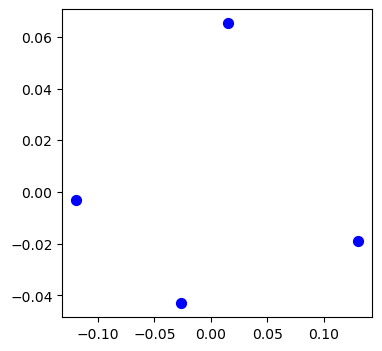

In [72]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(centroids)

ax.scatter(centroids_2d[:,0], centroids_2d[:,1], s=50, c='b')

plt.show()

# User participation